#PROJECT NAME : EMAIL SPAM CLASSIFICATION

In [2]:
#starting with importing libraaries
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/ProjectDatasetEE.csv' , encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,spam,"strictly private . gooday , with warm hear...",NaN,NaN,NaN
2,spam,"all graphics software available , cheap oem ...",NaN,NaN,NaN
3,spam,important 42745 start your own adult enter...,NaN,NaN,NaN
4,spam,"the government grants you $ 25 , 000 ! free...",NaN,NaN,NaN


In [4]:
df.shape

(5644, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5644 non-null   object
 1   v2          5644 non-null   object
 2   Unnamed: 2  37 non-null     object
 3   Unnamed: 3  9 non-null      object
 4   Unnamed: 4  4 non-null      object
dtypes: object(5)
memory usage: 220.6+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,"strictly private . gooday , with warm hear..."
2,spam,"all graphics software available , cheap oem ..."
3,spam,important 42745 start your own adult enter...
4,spam,"the government grants you $ 25 , 000 ! free..."


In [8]:
df.rename(columns={'v1' : 'target' , 'v2' : 'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,spam,"strictly private . gooday , with warm hear..."
2,spam,"all graphics software available , cheap oem ..."
3,spam,important 42745 start your own adult enter...
4,spam,"the government grants you $ 25 , 000 ! free..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,"strictly private . gooday , with warm hear..."
2,1,"all graphics software available , cheap oem ..."
3,1,important 42745 start your own adult enter...
4,1,"the government grants you $ 25 , 000 ! free..."


In [13]:
# checking is there any missing value or not?
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# checking is there any duplicate value or not?
df.duplicated().sum()

279

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5365, 2)

#EDA - Exploratory data analysis

In [18]:
df['target'].value_counts()

0    3352
1    2013
Name: target, dtype: int64

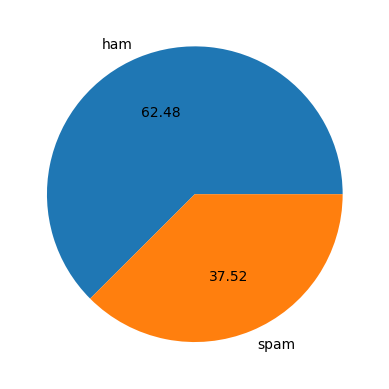

In [19]:
#pie chart for HAM-SPAM portion
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

#Ham-62.48%, Spam-37.52%

In [20]:
pip install nltk

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,1,"strictly private . gooday , with warm hear...",4913
2,1,"all graphics software available , cheap oem ...",969
3,1,important 42745 start your own adult enter...,1059
4,1,"the government grants you $ 25 , 000 ! free...",17631


In [25]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,1,"strictly private . gooday , with warm hear...",4913,1008
2,1,"all graphics software available , cheap oem ...",969,202
3,1,important 42745 start your own adult enter...,1059,193
4,1,"the government grants you $ 25 , 000 ! free...",17631,3402


In [27]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,"strictly private . gooday , with warm hear...",4913,1008,43
2,1,"all graphics software available , cheap oem ...",969,202,18
3,1,important 42745 start your own adult enter...,1059,193,7
4,1,"the government grants you $ 25 , 000 ! free...",17631,3402,179


In [29]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5365.000000,5365.000000,5365.000000
mean,395.042125,81.913141,6.161603
std,1266.198054,252.304523,15.922438
min,2.000000,1.000000,1.000000
25%,45.000000,11.000000,1.000000
50%,100.000000,23.000000,2.000000
75%,200.000000,44.000000,5.000000
max,28425.000000,6129.000000,438.000000


In [30]:
#for ham
df[df['target'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,3352.000000,3352.000000,3352.000000
mean,71.325477,17.332936,1.833532
std,53.315914,12.962131,1.408410
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,93.000000,22.000000,2.000000
max,611.000000,220.000000,38.000000


In [31]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,2013.000000,2013.000000,2013.000000
mean,934.087432,189.450571,13.368604
std,1950.450621,388.475507,24.277927
min,11.000000,2.000000,1.000000
25%,157.000000,32.000000,3.000000
50%,407.000000,80.000000,7.000000
75%,918.000000,202.000000,13.000000
max,28425.000000,6129.000000,438.000000


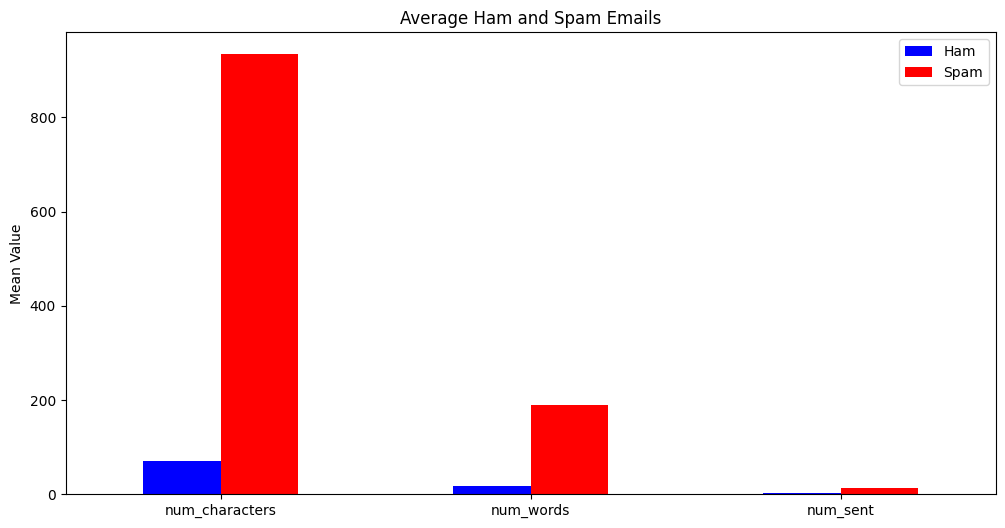

In [32]:
#bar chart with comparision of characteristic
import matplotlib.pyplot as plt
import seaborn as sns
num_features = ['num_characters', 'num_words', 'num_sent']
df_grouped = df[num_features + ['target']]
grouped_data = df_grouped.groupby('target').mean()
fig, ax = plt.subplots(figsize=(12, 6))

grouped_data.T.plot(kind='bar', ax=ax, color=['blue', 'red'])
plt.title('Average Ham and Spam Emails')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(['Ham', 'Spam'])
plt.show()

#Data preprocessing

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_word = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
ps = PorterStemmer()
snow = SnowballStemmer("english") #i m using portstemmer instead of snowballstemmer because both are same just tested
ps.stem('walking') #example
#snow.stem('walking') #example

'walk'

In [37]:
#creating function to pre-process the text
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [38]:
transform_text('Hola My Name i#s NIJ And ?? @mail Dancing Coding () what you are doing me')

'hola name nij mail danc code'

In [39]:
#now applying 'transform_text' function to our 'text' column

df['text'].apply(transform_text)
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,"strictly private . gooday , with warm hear...",4913,1008,43,strictli privat gooday warm heart friend send ...
2,1,"all graphics software available , cheap oem ...",969,202,18,graphic softwar avail cheap oem version good m...
3,1,important 42745 start your own adult enter...,1059,193,7,import 42745 start adult entertain busi entert...
4,1,"the government grants you $ 25 , 000 ! free...",17631,3402,179,govern grant 25 000 free person busi grant qua...


In [41]:
#wordcloud for spam
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white',collocations=False)

In [42]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

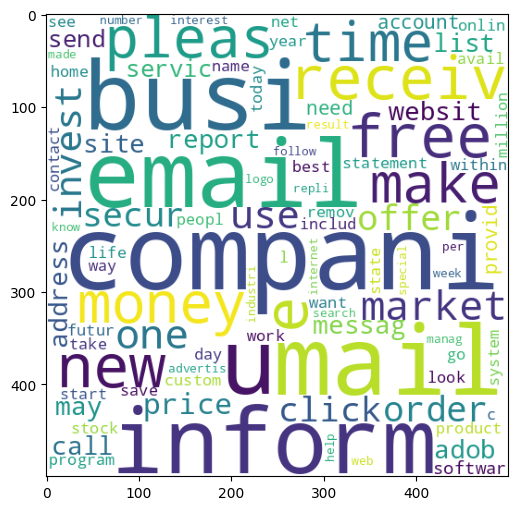

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
#wordcloud for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

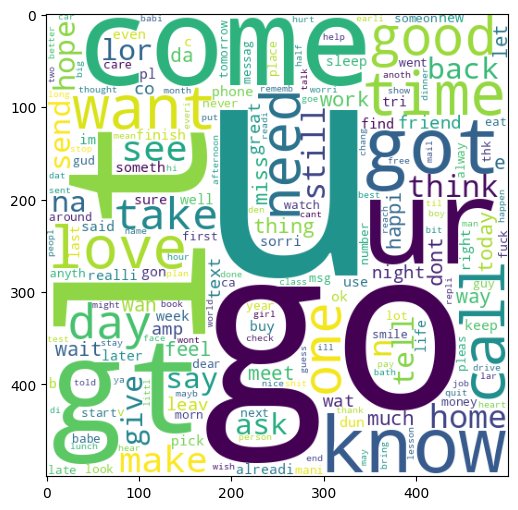

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus = []
df[df['target'] == 1]['transformed_text'].tolist()
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [47]:
len(spam_corpus)

183067

In [48]:
#for spam
from collections import Counter
Counter(spam_corpus).most_common(30)

[('compani', 1068),
 ('com', 1000),
 ('1', 980),
 ('mail', 917),
 ('busi', 898),
 ('email', 867),
 ('inform', 827),
 ('free', 797),
 ('get', 767),
 ('2', 765),
 ('receiv', 758),
 ('e', 702),
 ('5', 695),
 ('pleas', 668),
 ('money', 666),
 ('3', 624),
 ('http', 621),
 ('make', 614),
 ('time', 611),
 ('one', 602),
 ('market', 601),
 ('new', 567),
 ('offer', 560),
 ('000', 560),
 ('use', 558),
 ('order', 558),
 ('click', 557),
 ('us', 544),
 ('invest', 540),
 ('secur', 521)]

In [49]:
#for ham
ham_corpus = []
df[df['target'] == 0]['transformed_text'].tolist()
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [50]:
len(ham_corpus)

26538

In [51]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 675),
 ('go', 311),
 ('get', 250),
 ('gt', 220),
 ('lt', 216),
 ('come', 208),
 ('2', 202),
 ('know', 188),
 ('like', 182),
 ('call', 178),
 ('got', 171),
 ('time', 166),
 ('ok', 163),
 ('love', 159),
 ('want', 156),
 ('ur', 156),
 ('good', 147),
 ('day', 137),
 ('need', 128),
 ('one', 125),
 ('home', 118),
 ('think', 115),
 ('see', 112),
 ('4', 111),
 ('take', 108),
 ('lor', 103),
 ('back', 99),
 ('still', 99),
 ('dont', 97),
 ('today', 96)]

#Vectorizing

In [52]:
#installing sklearn library
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [53]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #i will use Tfidf instead of Countvectorizer for more accuracy and improvement
Tfidf = TfidfVectorizer()

In [54]:
x = Tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0956254 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.26396532, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00647193, 0.00573124, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [56]:
y = df['target'].values

In [57]:
y

array([0, 1, 1, ..., 1, 1, 1])

#Train-Test Splitting

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=2)

#Model Building

In [61]:
#installing important libraries for model building
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [63]:
#assigning model initially
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()

#Finding the best hyperparameters

In [ ]:
#for decision tree
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5, scoring='f1')

# Fit the model to the data
grid_search_dtc.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Decision Tree Classifier:", grid_search_dtc.best_params_)

# Get the best model
best_dtc_model = grid_search_dtc.best_estimator_

Best Hyperparameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [65]:
#for support vector machine
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Create an SVC classifier
svc = SVC()

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='f1')

# Fit the model to the data
grid_search_svc.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters for Support Vector Machine (SVC):", grid_search_svc.best_params_)

# Get the best model
best_svc_model = grid_search_svc.best_estimator_

Best Hyperparameters for Support Vector Machine (SVC): {'C': 1, 'kernel': 'rbf', 'degree': 2, 'gamma': 'scale'}


In [66]:
#Finding the best suitable Hyperparameters for MNB Model

from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters and their possible values
param_grid_mnb = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(mnb, param_grid_mnb, cv=5, scoring='f1')

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best Hyperparameters: {'alpha': 0.1}


In [67]:
#for random forest
from sklearn.model_selection import GridSearchCV

param_grid_rfc = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Creating a GridSearchCV object
grid_search_rf = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='f1', n_jobs=-1)

# Fitting the model to the data
grid_search_rf.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search_rf.best_params_)

#best model of RF
best_rf_model = grid_search_rf.best_estimator_

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}


In [68]:
#assigning models with the hyperparameters
mnb_new = MultinomialNB(alpha=5.0)
dtc_new = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split= 10)
rfc_new = RandomForestClassifier(n_estimators=100, max_depth= None, max_features='sqrt')
svm_new = SVC(kernel='rbf', C=1, degree=2, gamma='scale')

In [69]:
clfs = {'NB' : mnb_new, 'DT' : dtc_new, 'RF' : rfc_new, 'SVM' : svm_new}

In [70]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  return accuracy, precision, f1

In [ ]:
train_classifier(svm_new,x_train,y_train,x_test,y_test)

(0.9731543624161074, 0.9835575485799701, 0.9733727810650888)

In [71]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision,current_f1 = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("for ",name)
  print("Accuracy - ",current_accuracy)
  print("pricision - ",current_precision)
  print("f1 - ",current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  f1_scores.append(current_f1)

for  NB
Accuracy -  0.9090231170768084
pricision -  0.8582375478927203
f1 -  0.9167803547066848
for  DT
Accuracy -  0.9485458612975392
pricision -  0.9475218658892128
f1 -  0.9495982468955441
for  RF
Accuracy -  0.9783743475018642
pricision -  1.0
f1 -  0.9783096484667165
for  SVM
Accuracy -  0.9776286353467561
pricision -  0.9939485627836612
f1 -  0.9776785714285715


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'f1':f1_scores}).sort_values(['Precision','Accuracy','f1'],ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision,f1
2,RF,0.978374,1.000000,0.978310
3,SVM,0.977629,0.993949,0.977679
1,DT,0.948546,0.947522,0.949598
0,NB,0.909023,0.858238,0.916780


Comparision of Performance Metrics for each model

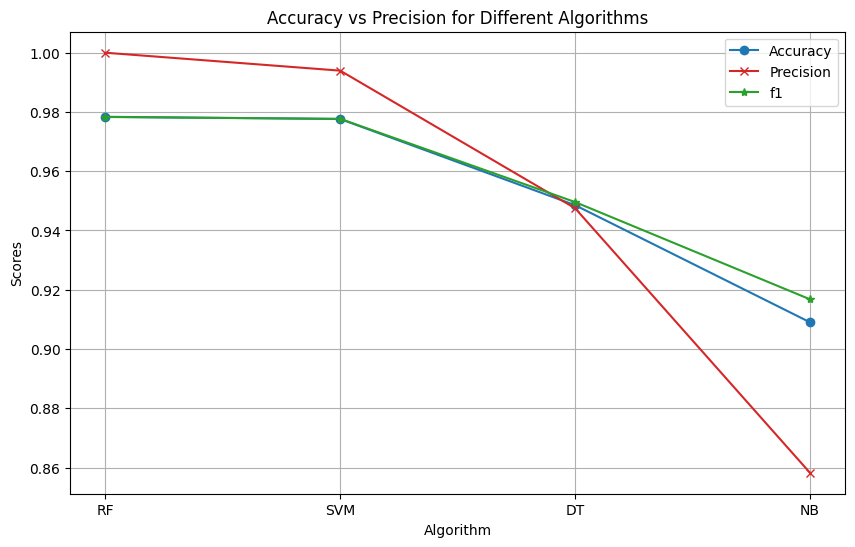

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Plotting the scores with lines connecting them
plt.plot(performance_df['Algorithm'], performance_df['Accuracy'], color='tab:blue', label='Accuracy', marker='o')
plt.plot(performance_df['Algorithm'], performance_df['Precision'], color='tab:red', label='Precision', marker='x')
plt.plot(performance_df['Algorithm'], performance_df['f1'], color='tab:green', label='f1', marker='*')
plt.xlabel('Algorithm')
plt.ylabel('Scores')
plt.title('Accuracy vs Precision for Different Algorithms')
plt.legend()
plt.grid(True)
plt.show()

Cross-validation on MNB

In [75]:
from sklearn.model_selection import cross_val_score, KFold

# number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing cross-validation
cross_val_results = cross_val_score(mnb_new, x_train, y_train, cv=kf, scoring='f1')

# Printing the results
print("Cross-Validation Results:")
print("Mean F1 Score:", cross_val_results.mean())
print("Standard Deviation:", cross_val_results.std())

Cross-Validation Results:
Mean F1 Score: 0.9144443333666411
Standard Deviation: 0.01816482027593451


Cross-validation on Random Forest

In [76]:
# number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing cross-validation
cross_val_results = cross_val_score(rfc_new, x_train, y_train, cv=kf, scoring='f1')

# Printing the results
print("Cross-Validation Results:")
print("Mean F1 Score:", cross_val_results.mean())
print("Standard Deviation:", cross_val_results.std())

Cross-Validation Results:
Mean F1 Score: 0.9735219328576322
Standard Deviation: 0.005508424196587164


Cross-validation on Support Vector Machine

In [77]:
# number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing cross-validation
cross_val_results = cross_val_score(svm_new, x_train, y_train, cv=kf, scoring='f1')

# Printing the results
print("Cross-Validation Results:")
print("Mean F1 Score:", cross_val_results.mean())
print("Standard Deviation:", cross_val_results.std())

Cross-Validation Results:
Mean F1 Score: 0.9730915667699858
Standard Deviation: 0.007672098088400527


Cross-validation on Decision Tree

In [78]:
# number of folds (k)
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing cross-validation
cross_val_results = cross_val_score(dtc_new, x_train, y_train, cv=kf, scoring='f1')

# Printing the results
print("Cross-Validation Results:")
print("Mean F1 Score:", cross_val_results.mean())
print("Standard Deviation:", cross_val_results.std())

Cross-Validation Results:
Mean F1 Score: 0.9487419861325529
Standard Deviation: 0.004967184376277291


#Deployment

In [82]:
#pipeline for RFC
from joblib import dump
dump(Tfidf, 'vectorizerrfc.joblib')
dump(rfc_new, 'modelrfc.joblib')

['modelrfc.joblib']